# PROJECT PHASE 3 SUBMISSION

# NAMES: Madison, Nakul, Huy, Mark


In [1]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import requests
from datetime import datetime
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from bs4 import BeautifulSoup
import numpy as np
from datetime import time

# import wbgapi as wb 
# documentation: https://pypi.org/project/wbgapi/

In [2]:
#only select the rows where year is from 1970 
#because that's when most countries began to have CO2 Emission data
df = pd.read_csv('gdp_co2_pop_1970_2023.csv')

#df['CO2 Emission'] = df['CO2 Emission'] * 1000

### Some countries still have NaN CO2 Emission. We replaced these NaN with the Average Emission
We won't be able to do any Regression when there are NaN values

In [3]:
#There are still countries with NaN CO2 Emission, let's fill these NaN with the average value of Emission
#df['CO2 Emission'] = df['CO2 Emission'].fillna(df['CO2 Emission'].mean())


In [4]:
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
import scipy.stats as stats
import pylab as py
from sklearn.preprocessing import PolynomialFeatures

from sklearn.impute import SimpleImputer

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

## Linear Regression

In [5]:
def add_bias_column(X):
    """
    Args:
        X (array): can be either 1-d or 2-d
    
    Returns:
        Xnew (array): the same array, but 2-d with a column of 1's in the first spot
    """
    
    # If the array is 1-d
    if len(X.shape) == 1:
        Xnew = np.column_stack([np.ones(X.shape[0]), X])
    
    # If the array is 2-d
    elif len(X.shape) == 2:
        bias_col = np.ones((X.shape[0], 1))
        Xnew = np.hstack([bias_col, X])
        
    else:
        raise ValueError("Input array must be either 1-d or 2-d")

    return Xnew

def line_of_best_fit(X, y): 
    '''
    Args: 
        X (array): can be either 1-d or 2-d
        y (array): 1-d
    Returns: 
        m (vector): coefficient and intercept of the line of best fit 
    '''

    Xnew = add_bias_column(X) #add the '1' column to X

    m = np.matmul(np.linalg.inv(np.matmul(Xnew.T, Xnew)), np.matmul(Xnew.T, y))

    return m

def linreg_predict(Xnew, ynew, m): 
    '''
    Args: 
        Xnew (array): can be either 1-d or 2-d
        ynew (array): 1-d
        m (vector): coefficient and intercept of the line of best fit 
    Returns: 
        a dictionary containing ypreds, resids, mse, r2 
    '''
    ypreds = np.matmul(add_bias_column(Xnew), m) 
    #need to add bias column to Xnew, otherwise matmul won't work because inner dimensions mismatch
    
    resids = ynew - ypreds
    
    mse = (resids**2).mean()
    
    r2 = 1 - (mse / ynew.var())

    return {'ypreds':ypreds, 'resids':resids, 'mse':mse, 'r2':r2}

def get_mse(y_true, y_pred):
    '''
    Params: 
        y_true: the actual y value
        y_pred: the predicted y value

    Returns: 
        the mse score
    '''
    # calculate the mean squared distance between the predicted and actual y
    return np.mean((y_true - y_pred) ** 2)

def show_fit(X, y, slope, intercept):
    '''
    Params: 
        X: x value
        y: y value
        slope: slope of the line of best fit
        intercept: intercept of the line of best fit
    Returns:
        nothing, but plots the data points and a line of best fit
        Graph title is the equation of the line of best fit and MSE
    '''
    plt.figure()
    
    # in case this wasn't done before, transform the input data into numpy arrays and flatten them
    x = np.array(X).ravel()
    y = np.array(y).ravel()
    
    # plot the actual data
    plt.scatter(x, y, label='data')
    
    # compute linear predictions 
    # x is a numpy array so each element gets multiplied by slope and intercept is added
    y_pred = slope * x + intercept
    
    # plot the linear fit
    plt.plot(x, y_pred, color='black',
             ls=':',
             label='linear fit')
    
    plt.legend()
    
    plt.xlabel('x')
    plt.ylabel('y')
    
    # print the mean squared error
    y_pred = slope * x + intercept
    mse = get_mse(y_true=y, y_pred=y_pred)
    plt.suptitle(f'y_hat = {slope:.3f} * x + {intercept:.3f}, MSE = {mse:.3f}')
    

### Countries by income levels or regions

In [6]:
#GDP and CO2 Emission grouped by income levels
#these are keywords in the 'Country' column
income_levels = ['High income', 'Middle income', 'Least developed countries: UN classification']

countries_by_incomes = df[(df['Country'].isin(income_levels))]

regions = ['North America', 'South Asia', 'Sub-Saharan Africa']

countries_by_regions = df[(df['Country'].isin(regions))]


### Some countries still have NaN CO2 Emission. We replaced these NaN with the Average Emission
We won't be able to do any Regression when there are NaN values

### We sliced the df by certain incomes and regions, then fill the NaN in `CO2 Emission` with the `mean CO2 Emission` of the respective incomes and regions, so that this `mean` is more accurate (compared to the `mean CO2 Emission` of the entire df)

In [7]:
#There are still countries with NaN CO2 Emission, let's fill these NaN with the average value of Emission
countries_by_incomes['CO2 Emission'] = countries_by_incomes['CO2 Emission'].fillna(countries_by_incomes['CO2 Emission'].mean())

countries_by_regions['CO2 Emission'] = countries_by_regions['CO2 Emission'].fillna(countries_by_regions['CO2 Emission'].mean())

/var/folders/xw/yj2m39tn3rv0y3pw8fqb3nzm0000gn/T/ipykernel_39989/1401789788.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  countries_by_incomes['CO2 Emission'] = countries_by_incomes['CO2 Emission'].fillna(countries_by_incomes['CO2 Emission'].mean())
/var/folders/xw/yj2m39tn3rv0y3pw8fqb3nzm0000gn/T/ipykernel_39989/1401789788.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  countries_by_regions['CO2 Emission'] = countries_by_regions['CO2 Emission'].fillna(countries_by_regions['CO2 Emission'].mean())


### Separate Regions

In [8]:
# North America
north_america = df[(df['Country'] == 'North America')]
north_america['CO2 Emission'] = north_america['CO2 Emission'].fillna(north_america['CO2 Emission'].mean())

# South Asia
south_asia = df[(df['Country'] == 'South Asia')]
south_asia['CO2 Emission'] = south_asia['CO2 Emission'].fillna(south_asia['CO2 Emission'].mean())

# Sub-Saharan Africa
sub_saharan_africa = df[(df['Country'] == 'Sub-Saharan Africa')]
sub_saharan_africa['CO2 Emission'] = sub_saharan_africa['CO2 Emission'].fillna(sub_saharan_africa['CO2 Emission'].mean())

/var/folders/xw/yj2m39tn3rv0y3pw8fqb3nzm0000gn/T/ipykernel_39989/2376184790.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  north_america['CO2 Emission'] = north_america['CO2 Emission'].fillna(north_america['CO2 Emission'].mean())
/var/folders/xw/yj2m39tn3rv0y3pw8fqb3nzm0000gn/T/ipykernel_39989/2376184790.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  south_asia['CO2 Emission'] = south_asia['CO2 Emission'].fillna(south_asia['CO2 Emission'].mean())
/var/folders/xw/yj2m39tn3rv0y3pw8fqb3nzm0000gn/T/ip

In [9]:
countries_by_incomes.head()

,Unnamed: 0,Country,Year,CO2 Emission,GDP per Capita,Total Population
10768,10768,Middle income,2023,12197.964635,6266.777432,5.870153e+09
10769,10769,Middle income,2022,32735.783700,6165.896194,5.823625e+09
10770,10770,Middle income,2021,32269.952300,5925.770975,5.782549e+09
10771,10771,Middle income,2020,30815.609600,5068.539981,5.731777e+09
10772,10772,Middle income,2019,31127.202400,5281.783603,5.675825e+09


### Predict North America's CO2 Emission with Total Population

In [10]:
# use population North America as X
X_pop_NA = np.array(north_america['Total Population'])
y_NA = np.array(north_america['CO2 Emission'])

y_NA

array([6958.81446226, 6766.7488    , 6649.0023    , 6319.7877    ,
       6921.5044    , 7068.3165    , 6876.6089    , 6918.6899    ,
       7046.0667    , 7171.7851    , 7131.0551    , 6979.0885    ,
       7220.4325    , 7405.5997    , 7141.6435    , 7650.4876    ,
       7856.8059    , 7726.4251    , 7839.8485    , 7827.4744    ,
       7742.0999    , 7657.4357    , 7798.5113    , 7891.6511    ,
       7703.1599    , 7688.8805    , 7631.1176    , 7335.3681    ,
       7148.6371    , 7064.4303    , 6931.4832    , 6800.6217    ,
       6685.5084    , 6738.392     , 6879.8929    , 6791.683     ,
       6521.0587    , 6345.728     , 6406.1       , 6402.3609    ,
       6154.5956    , 6183.8091    , 6472.022     , 6572.0023    ,
       6799.513     , 6718.3034    , 6719.064     , 6542.0103    ,
       6215.3756    , 6446.9754    , 6615.7278    , 6389.0367    ,
       6095.5458    , 6211.6941    ])

In [11]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X_pop_NA, y_NA, test_size=0.3, random_state = 3)

#line of best fit with train sets
mtrain_NA = line_of_best_fit(Xtrain, ytrain)

#dict contains ypreds, resids, mse, r2 of North America
linreg_pred_vals_NA = linreg_predict(Xtest, ytest, mtrain_NA)

mtrain_NA

array([5.36643558e+03, 5.33553698e-06])

In [12]:
linreg_pred_vals_NA['resids']

array([   7.96907196, -107.97995002,  -82.81982371, -216.14336255,
       -359.2561091 ,  -86.14237251,  206.95049475,  689.39650198,
       -182.46378055, -419.85620853, -362.87244942,  724.29859721,
        -22.5457011 ,   24.87725253, -496.34327452, -397.8036523 ,
        373.26364157])

In [13]:
#line of best fit with the whole data
mfull_NA = line_of_best_fit(X_pop_NA, y_NA)

full_linreg_pred_vals_NA = linreg_predict(X_pop_NA, y_NA, mfull_NA)

mfull_NA

array([5.13401430e+03, 6.06440909e-06])

In [14]:
full_linreg_pred_vals_NA['resids']

array([ -449.8150221 ,  -624.88770674,  -730.98170544, -1055.75023849,
        -432.15857813,  -272.98950475,  -451.09062658,  -393.94585271,
        -249.96237795,  -108.33584428,  -132.81569612,  -269.31753746,
         -11.79012207,   189.07842132,   -57.10338982,   470.3020289 ,
         696.1571624 ,   584.99661555,   717.77847658,   723.69245122,
         656.47555616,   588.58802843,   747.82647302,   860.02270829,
         692.19539402,   698.73180534,   661.87092829,   387.70525456,
         221.74054997,   158.48066774,    46.90035488,   -61.40872962,
        -153.07448915,   -77.72845735,    83.29281734,    12.09678685,
        -243.02904244,  -403.18180001,  -327.84498517,  -317.42649169,
        -551.4007493 ,  -507.76614512,  -204.419961  ,   -89.00193141,
         153.57878274,    88.7948834 ,   105.22324816,   -56.78929215,
        -369.05902621,  -122.57773635,    59.88503121,  -152.94335115,
        -431.3276201 ,  -295.49041548])

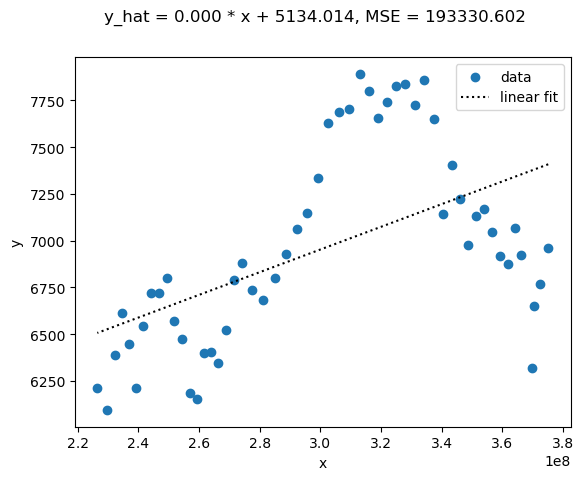

In [15]:
show_fit(X_pop_NA, y_NA, mfull_NA[1], mfull_NA[0])

### Predict North America's CO2 Emission with GDP per Capita

In [16]:
X_GDP_NA = np.array(north_america['GDP per Capita'])
y_NA = np.array(north_america['CO2 Emission'])


### Cross Val

In [17]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X_pop_NA, y_NA, test_size=0.3, random_state = 3)

#line of best fit with train sets
mtrain_NA = line_of_best_fit(Xtrain, ytrain)

#dict contains ypreds, resids, mse, r2 of North America
linreg_pred_vals_NA = linreg_predict(Xtest, ytest, mtrain_NA)

mtrain_NA

array([5.36643558e+03, 5.33553698e-06])

In [18]:
linreg_pred_vals_NA['resids']

array([   7.96907196, -107.97995002,  -82.81982371, -216.14336255,
       -359.2561091 ,  -86.14237251,  206.95049475,  689.39650198,
       -182.46378055, -419.85620853, -362.87244942,  724.29859721,
        -22.5457011 ,   24.87725253, -496.34327452, -397.8036523 ,
        373.26364157])

### Whole data

In [19]:
#line of best fit with the whole data
mfull_NA = line_of_best_fit(X_GDP_NA, y_NA)

full_linreg_pred_vals_NA = linreg_predict(X_GDP_NA, y_NA, mfull_NA)

mfull_NA

array([6.57142593e+03, 1.17022034e-02])

In [20]:
res_NA = full_linreg_pred_vals_NA['resids']

In [21]:
mse_NA = full_linreg_pred_vals_NA['mse']
mse_NA

216100.54860502164

In [22]:
r2_NA = full_linreg_pred_vals_NA['r2']
r2_NA

0.20247003930009455

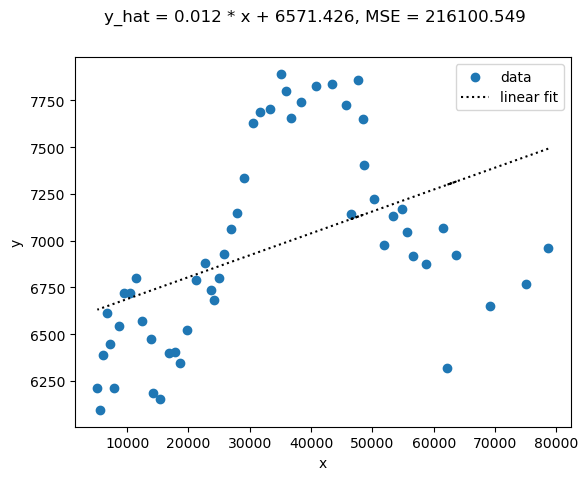

In [23]:
show_fit(X_GDP_NA, y_NA, mfull_NA[1], mfull_NA[0])

## Multiple Regression

### By regions

### Standardize the data

In [24]:
#standardize the data
x_feat_list = ['GDP per Capita', 'Total Population', 'Year']
X = countries_by_regions[x_feat_list]
#X['Country'] = countries_by_regions['Country']

#we'll concatenate regions into X later, otherwise with regions we can't perform standardization of X feature
for x_feat in x_feat_list: 
    X[x_feat] = (X[x_feat] - X[x_feat].mean())/X[x_feat].std() #standardization of each x feature

#Useful for plotting
gdp_per_capita = np.array(X['GDP per Capita'])
pop = np.array(X['Total Population'])

X = np.array(X)

y = np.array(countries_by_regions['CO2 Emission'])

X

/var/folders/xw/yj2m39tn3rv0y3pw8fqb3nzm0000gn/T/ipykernel_39989/3949008468.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[x_feat] = (X[x_feat] - X[x_feat].mean())/X[x_feat].std() #standardization of each x feature


array([[-0.52012041,  0.95538402,  1.6950115 ],
       [-0.51673303,  0.89428117,  1.6310488 ],
       [-0.52014572,  0.83453304,  1.5670861 ],
       [-0.52774653,  0.77511533,  1.5031234 ],
       [-0.52036704,  0.71591232,  1.4391607 ],
       [-0.52046186,  0.65791903,  1.37519801],
       [-0.52578709,  0.60117212,  1.31123531],
       [-0.52888298,  0.54599599,  1.24727261],
       [-0.51920902,  0.49136129,  1.18330991],
       [-0.50588479,  0.43725388,  1.11934721],
       [-0.50732376,  0.38470307,  1.05538452],
       [-0.51061092,  0.33342944,  0.99142182],
       [-0.511606  ,  0.28359156,  0.92745912],
       [-0.51964307,  0.23487148,  0.86349642],
       [-0.53090573,  0.1872916 ,  0.79953372],
       [-0.52522457,  0.14104242,  0.73557103],
       [-0.53270315,  0.09602592,  0.67160833],
       [-0.5408732 ,  0.05243055,  0.60764563],
       [-0.54920611,  0.01038312,  0.54368293],
       [-0.55676896, -0.03027249,  0.47972023],
       [-0.5651988 , -0.06959395,  0.415

### One hot encoding the Regions

In [25]:
country_dummies = pd.get_dummies(countries_by_regions, columns=['Country'], drop_first = True)
countryX = np.array(country_dummies.iloc[:,-2:]).astype('int')
countryX

array([[0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1,

In [26]:
X_new = np.concatenate([X, countryX], axis=1)
X_new

array([[-0.52012041,  0.95538402,  1.6950115 ,  0.        ,  1.        ],
       [-0.51673303,  0.89428117,  1.6310488 ,  0.        ,  1.        ],
       [-0.52014572,  0.83453304,  1.5670861 ,  0.        ,  1.        ],
       [-0.52774653,  0.77511533,  1.5031234 ,  0.        ,  1.        ],
       [-0.52036704,  0.71591232,  1.4391607 ,  0.        ,  1.        ],
       [-0.52046186,  0.65791903,  1.37519801,  0.        ,  1.        ],
       [-0.52578709,  0.60117212,  1.31123531,  0.        ,  1.        ],
       [-0.52888298,  0.54599599,  1.24727261,  0.        ,  1.        ],
       [-0.51920902,  0.49136129,  1.18330991,  0.        ,  1.        ],
       [-0.50588479,  0.43725388,  1.11934721,  0.        ,  1.        ],
       [-0.50732376,  0.38470307,  1.05538452,  0.        ,  1.        ],
       [-0.51061092,  0.33342944,  0.99142182,  0.        ,  1.        ],
       [-0.511606  ,  0.28359156,  0.92745912,  0.        ,  1.        ],
       [-0.51964307,  0.23487148,  0.8

### Cross Val

In [27]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X_new, y, test_size=0.3, random_state = 3)

mtrain_region = line_of_best_fit(Xtrain, ytrain)

linreg_pred_vals_region = linreg_predict(Xtest, ytest, mtrain_region)

mtrain_region

array([ 8191.93649633,  -286.16088096,  1074.44959304,   242.82995519,
       -6995.85809093, -6478.15287088])

In [28]:
linreg_pred_vals_region['mse']

111169.21636540668

In [29]:
linreg_pred_vals_region['r2']

0.9815989187955019

### Whole Data

In [30]:
m_region_full = line_of_best_fit(X_new, y)
full_linreg_predict_region = linreg_predict(X_new, y, m_region_full)
res_region = full_linreg_predict_region['resids']

In [31]:
mse_region = full_linreg_predict_region['mse']
mse_region

195729.3999733081

In [32]:
r2_region = full_linreg_predict_region['r2']
r2_region

0.9673624620969985

### Check Assumptions

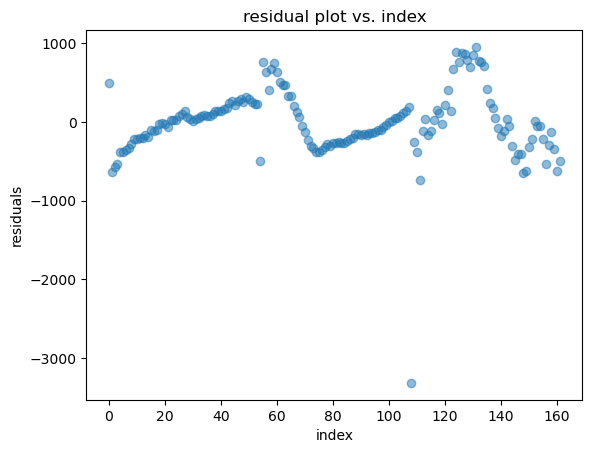

In [33]:
# order i.e. index vs res
# CHECK AUTOCORRELATION
plt.scatter(range(len(X_new)), res_region, alpha=0.5)
plt.xlabel("index")
plt.ylabel("residuals")
plt.title("residual plot vs. index")
plt.show()

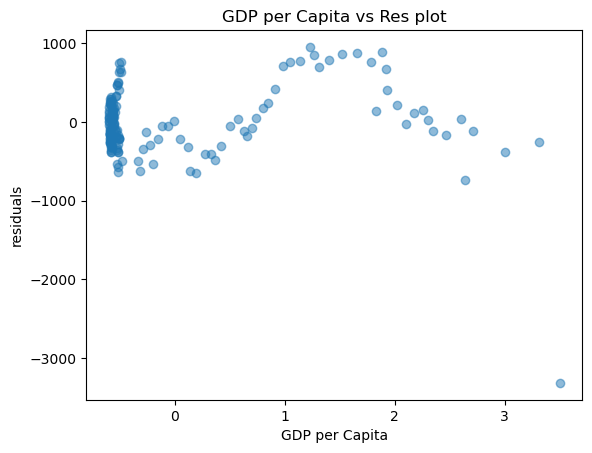

In [34]:
# GDP per Capita (i.e. X) versus Residuals
# CHECK LINEARITY and Homoscedasticity
plt.scatter(gdp_per_capita, res_region, alpha=0.5)
plt.xlabel("GDP per Capita")
plt.ylabel("residuals")
plt.title("GDP per Capita vs Res plot")
plt.show()

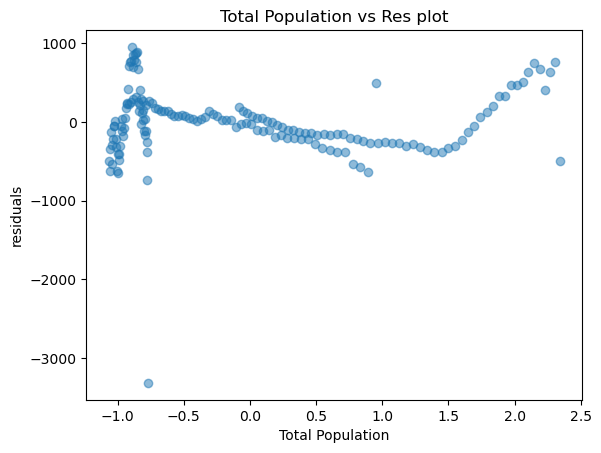

In [35]:
# Population (i.e. X) versus Residuals
# CHECK LINEARITY and Homoscedasticity
plt.scatter(pop, res_region, alpha=0.5)
plt.xlabel("Total Population")
plt.ylabel("residuals")
plt.title("Total Population vs Res plot")
plt.show()

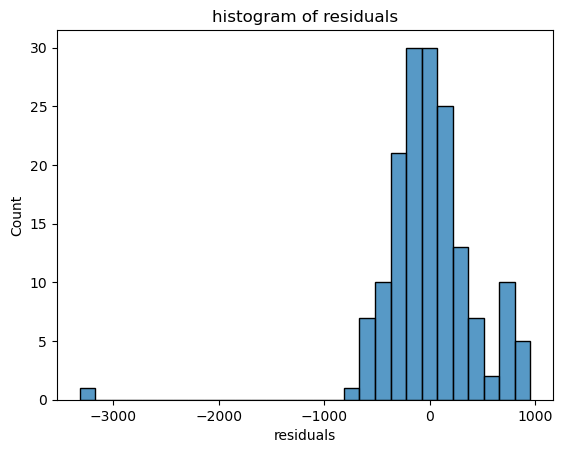

In [36]:
# histogram of residuals
# CHECK NORMALITY
sns.histplot(res_region, kde=False)
plt.xlabel("residuals")
plt.title("histogram of residuals")
plt.show()

- linearity: good, there are 4 outliers. Residuals are cluttered when `GDP per Capita` and `Total Population` are small. 
- auto correlation: good, we have included multiple X attributes `GDP per Capita`, `Total Population`, `Year` and One Hot Encoded `income level`
- normality: yes, residuals are mostly centered around 0
- Homoscedasticity:
  - residuals are less cluttered, more spread out in a negative wave pattern as `Total Population` increases.
  - residuals are less cluttered, more spread out in a positive wave pattern as `GDP per Capita` increases. 

### Ethical considerations:

### By Income

### Standardize the data

In [37]:
#standardize the data
x_feat_list = ['GDP per Capita', 'Total Population', 'Year']
X = countries_by_incomes[x_feat_list]

#we'll concatenate regions into X later, otherwise with regions we can't perform standardization of X feature
for x_feat in x_feat_list: 
    X[x_feat] = (X[x_feat] - X[x_feat].mean())/X[x_feat].std() #standardization of each x feature
    
#Useful for plotting
gdp_per_capita = np.array(X['GDP per Capita'])
pop = np.array(X['Total Population'])

X = np.array(X)

y = np.array(countries_by_incomes['CO2 Emission'])

X

/var/folders/xw/yj2m39tn3rv0y3pw8fqb3nzm0000gn/T/ipykernel_39989/1021543344.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[x_feat] = (X[x_feat] - X[x_feat].mean())/X[x_feat].std() #standardization of each x feature


array([[-0.15621762,  2.2823854 ,  1.6950115 ],
       [-0.16412388,  2.25473382,  1.6310488 ],
       [-0.18294297,  2.23032217,  1.5670861 ],
       [-0.25012586,  2.20014768,  1.5031234 ],
       [-0.23341354,  2.16689552,  1.4391607 ],
       [-0.23873353,  2.13165651,  1.37519801],
       [-0.25892619,  2.09489257,  1.31123531],
       [-0.28764663,  2.05706161,  1.24727261],
       [-0.28762214,  2.01917536,  1.18330991],
       [-0.27202018,  1.98053425,  1.11934721],
       [-0.28409922,  1.94109169,  1.05538452],
       [-0.30067815,  1.90147213,  0.99142182],
       [-0.31778396,  1.8624341 ,  0.92745912],
       [-0.36442094,  1.82441706,  0.86349642],
       [-0.41224035,  1.78744902,  0.79953372],
       [-0.40985153,  1.75109466,  0.73557103],
       [-0.44483754,  1.71525962,  0.67160833],
       [-0.4803956 ,  1.68000577,  0.60764563],
       [-0.50374982,  1.64404251,  0.54368293],
       [-0.52411193,  1.60721019,  0.47972023],
       [-0.54089184,  1.57010306,  0.415

In [38]:
countries_by_incomes.head()

,Unnamed: 0,Country,Year,CO2 Emission,GDP per Capita,Total Population
10768,10768,Middle income,2023,12197.964635,6266.777432,5.870153e+09
10769,10769,Middle income,2022,32735.783700,6165.896194,5.823625e+09
10770,10770,Middle income,2021,32269.952300,5925.770975,5.782549e+09
10771,10771,Middle income,2020,30815.609600,5068.539981,5.731777e+09
10772,10772,Middle income,2019,31127.202400,5281.783603,5.675825e+09


### One Hot Encoding the Income Levels

In [39]:
#columns param is still 'Country', because these countries are grouped and named by income levels.
income_dummies = pd.get_dummies(countries_by_incomes, columns=['Country'], drop_first = True)
incomeX = np.array(income_dummies.iloc[:,-2:]).astype('int')
incomeX

array([[0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1,

In [40]:
X_new = np.concatenate([X, incomeX], axis=1)
X_new

array([[-0.15621762,  2.2823854 ,  1.6950115 ,  0.        ,  1.        ],
       [-0.16412388,  2.25473382,  1.6310488 ,  0.        ,  1.        ],
       [-0.18294297,  2.23032217,  1.5670861 ,  0.        ,  1.        ],
       [-0.25012586,  2.20014768,  1.5031234 ,  0.        ,  1.        ],
       [-0.23341354,  2.16689552,  1.4391607 ,  0.        ,  1.        ],
       [-0.23873353,  2.13165651,  1.37519801,  0.        ,  1.        ],
       [-0.25892619,  2.09489257,  1.31123531,  0.        ,  1.        ],
       [-0.28764663,  2.05706161,  1.24727261,  0.        ,  1.        ],
       [-0.28762214,  2.01917536,  1.18330991,  0.        ,  1.        ],
       [-0.27202018,  1.98053425,  1.11934721,  0.        ,  1.        ],
       [-0.28409922,  1.94109169,  1.05538452,  0.        ,  1.        ],
       [-0.30067815,  1.90147213,  0.99142182,  0.        ,  1.        ],
       [-0.31778396,  1.8624341 ,  0.92745912,  0.        ,  1.        ],
       [-0.36442094,  1.82441706,  0.8

### Cross Val

In [41]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X_new, y, test_size=0.3, random_state = 3)

mtrain_income = line_of_best_fit(Xtrain, ytrain)

linreg_pred_vals_income = linreg_predict(Xtest, ytest, mtrain_income)

mtrain_income

array([ 23415.54642745,    560.71922711,  12657.31265537,  -1085.05179894,
       -11411.50028237, -22656.1746988 ])

In [42]:
linreg_pred_vals_income['mse']

3112918.077163833

In [43]:
linreg_pred_vals_income['r2']

0.9601867604759458

### Whole Data

In [44]:
m_income_full = line_of_best_fit(X_new, y)
full_linreg_predict_income = linreg_predict(X_new, y, m_income_full)
res_income = full_linreg_predict_income['resids']

In [45]:
mse_income = full_linreg_predict_income['mse']
mse_income

4391334.465651456

In [46]:
r2_income = full_linreg_predict_income['r2']
r2_income

0.9464808749467452

### Check Assumptions

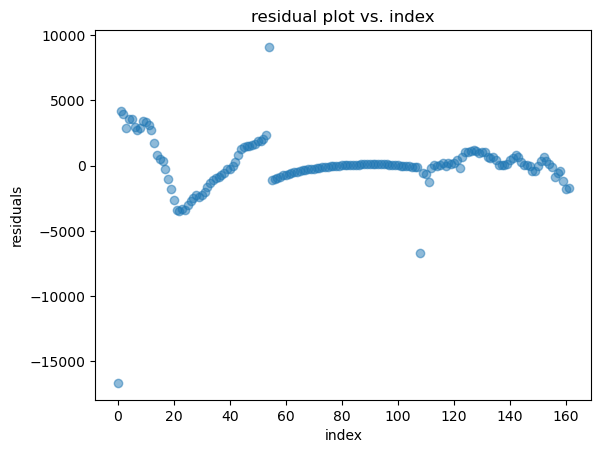

In [47]:
# order i.e. index vs res
# CHECK AUTOCORRELATION
plt.scatter(range(len(X_new)), res_income, alpha=0.5)
plt.xlabel("index")
plt.ylabel("residuals")
plt.title("residual plot vs. index")
plt.show()

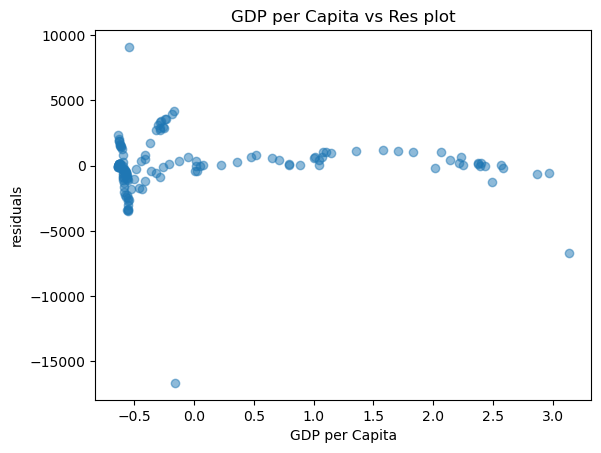

In [48]:
# GDP per Capita (i.e. X) versus Residuals
# CHECK LINEARITY and Homoscedasticity
plt.scatter(gdp_per_capita, res_income, alpha=0.5)
plt.xlabel("GDP per Capita")
plt.ylabel("residuals")
plt.title("GDP per Capita vs Res plot")
plt.show()

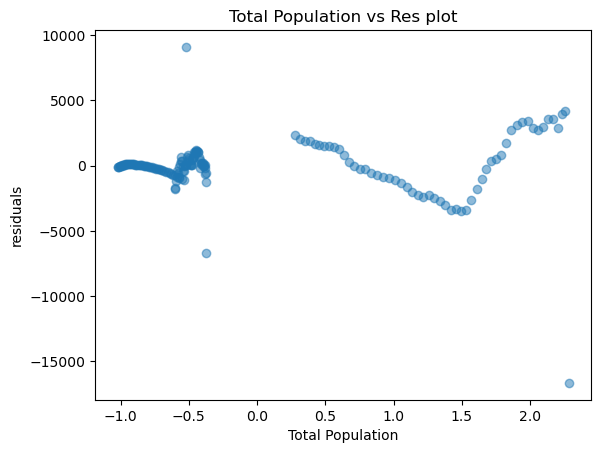

In [49]:
# Population (i.e. X) versus Residuals
# CHECK LINEARITY and Homoscedasticity
plt.scatter(pop, res_income, alpha=0.5)
plt.xlabel("Total Population")
plt.ylabel("residuals")
plt.title("Total Population vs Res plot")
plt.show()

# Analysis of Tital Population vs Res Plot
- For population from -1.0 to around 0.3, most of the residuals are grouped around zero. Which means that the model predicted more accurately countries with smaller total populations but there are some underestimations past 1.0. 

- There is a clear outlier at (2.7, -16,000).
- This implies that there is a severe underestimation for a country with a really big total population. 



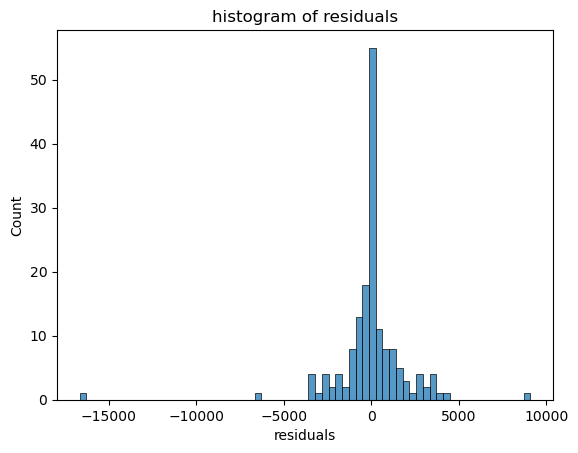

In [50]:
# histogram of residuals
# CHECK NORMALITY
sns.histplot(res_income, kde=False)
plt.xlabel("residuals")
plt.title("histogram of residuals")
plt.show()

- linearity: good, there are 3 outliers. `Total Population` is a bit strange looking because of the gap where there's no residual. 
- auto correlation: good, we have included multiple X attributes `GDP per Capita`, `Total Population`, `Year` and One Hot Encoded `income level`
- normality: yes, residuals are mostly centered around 0
- Homoscedasticity:
  - residuals are less cluttered and more centered around 0 as `GDP per Capita` increases
  - residuals are less cluttered but more spread out around 0 as `Total Population` increases. There is a gap where no residual is located when `Total Population` is between -0.5 and 0.5

### Ethical considerations:

## Polynomial Regression

### X is the Population

### Regions of North America, South Asia, and Sub-Saharan Africa

### No need to One hot encoding the Regions again, just call countryX from above

In [51]:
X_pop_regions = np.array(countries_by_regions['Total Population']).reshape(-1,1)

poly = PolynomialFeatures(degree = 4, include_bias=False)

X_poly = np.concatenate([X_pop_regions, countryX], axis = 1)

y = np.array(countries_by_regions['CO2 Emission'])

### Cross Val

In [52]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X_poly, y, test_size=0.3, random_state = 3)

m_poly = line_of_best_fit(Xtrain, ytrain)

linreg_predict_poly = linreg_predict(Xtest, ytest, m_poly)

linreg_predict_poly['mse']

93057.1594906663

In [53]:
linreg_predict_poly['r2']

0.9845968838817818

### Whole Data

In [54]:
m_poly_full = line_of_best_fit(X_poly, y)

full_linreg_predict_poly = linreg_predict(X_poly, y, m_poly_full)

res_poly = full_linreg_predict_poly['resids']
full_linreg_predict_poly['mse']

196068.45778553034

In [55]:
full_linreg_predict_poly['r2']

0.9673059247949927

### Check Assumptions

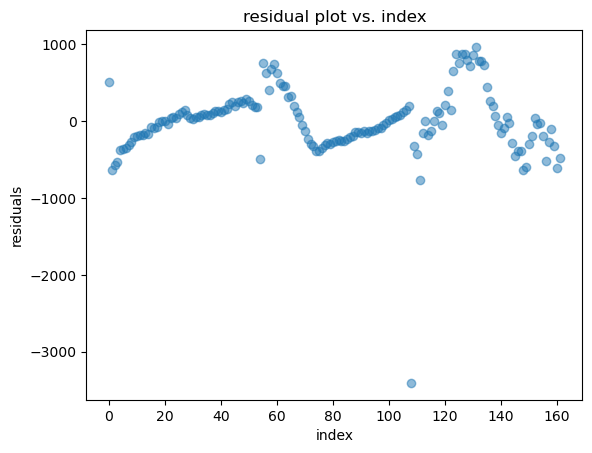

In [56]:
# order i.e. index vs res
# CHECK AUTOCORRELATION
plt.scatter(range(len(X_poly)), res_poly, alpha=0.5)
plt.xlabel("index")
plt.ylabel("residuals")
plt.title("residual plot vs. index")
plt.show()

# Analysis from Residual plot vs. Index
- The pattern of the residual plot vs the index is kind of in a zig-zag pattern with alternating upwards and downwards trends.
- This means that the residuals are not completly independant of the index -  or that the data points may influence each other. 
- There is a clear outlier at (-4000, 110) and it could be due to an extreme case or an anomaly in the data. 


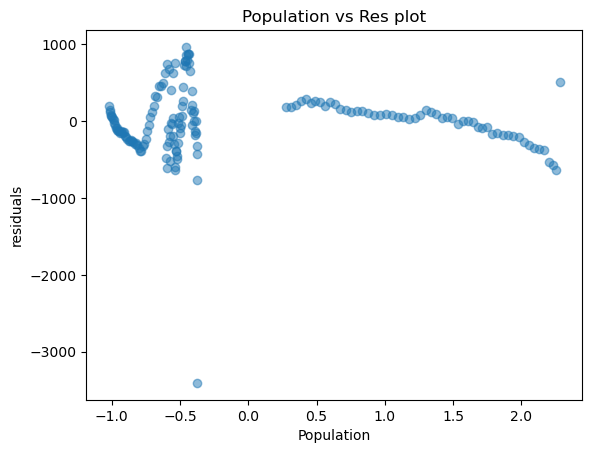

In [57]:
# Population (i.e. X) versus Residuals
# CHECK LINEARITY and Homoscedasticity
plt.scatter(pop, res_poly, alpha=0.5)
plt.xlabel("Population")
plt.ylabel("residuals")
plt.title("Population vs Res plot")
plt.show()

# Analysis of Population vs Res Plot
- For population from -1.0 to around 0.7, most of the residuals are grouped around zero. Which means that the model predicted more accurately countries with smaller populations but there are some underestimations. 

- There is a clear outlier at (-0.5, -3000).
- There is a clear underestimation by the model of CO2 emissions. The outlier could have high industrialization but low population which would account for it being an outlier in the plot graph. 



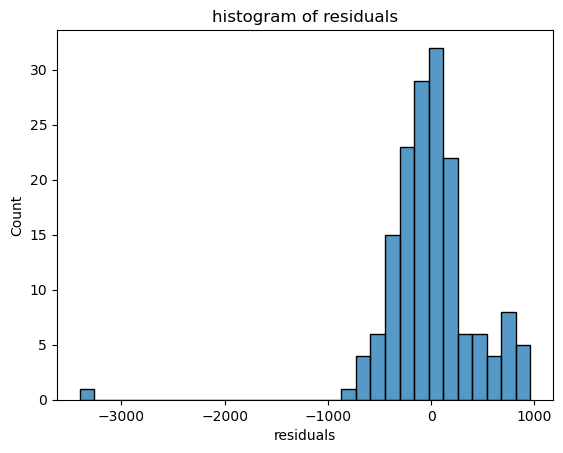

In [58]:
# histogram of residuals
# CHECK NORMALITY
sns.histplot(res_poly, kde=False)
plt.xlabel("residuals")
plt.title("histogram of residuals")
plt.show()

# Analysis of Histogram of Residuals:
- Most the residuals are around 0, so we can say the model is generally pretty accurate. As most of the plot points are a good prediction from the model. 
- The histogram is skewed to the left, so we can say on average the model underestimated the amount of CO2 emissions from a significant amount of countries. 

- There is a outlier around residual -3500.
- The outlier could be from missing data, or maybe a country has a unique situation when it comes to CO2 emissions because of an external factor we did not take into consideration with our data. 




- linearity: good, there are 2 outliers. Residuals are cluttered when `Total Population` is small. There is a gap where there is no Residual when `Total Population` is between -0.25 to 0.25 .
- auto correlation: good, we have included One Hot Encoded `Regions` into the X attribute `Total Population`
- normality: yes, residuals are mostly centered around 0
- Homoscedasticity:
  - residuals are more cluttered in a zig-zag pattern when `Total Population` is between -1 to -0.5, then there's a gap where there is no residual when `Total Population` is between -0.25 to 0.25. When `Total Population` is 0.25 to beyond, residuals are spread out around 0 in a descending curve.

### Ethical considerations:

### Countries by Income Levels: `High income`, `Middle income`, `Least developed countries: UN classification`

### No need to One hot encoding the Regions again, just call incomeX from above

In [59]:
X_pop_incomes = np.array(countries_by_incomes['Total Population']).reshape(-1,1)

poly = PolynomialFeatures(degree = 4, include_bias=False)

X_poly = np.concatenate([X_pop_incomes, incomeX], axis = 1)

y = np.array(countries_by_incomes['CO2 Emission'])

### Cross Val

In [60]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X_poly, y, test_size=0.3, random_state = 3)

m_poly = line_of_best_fit(Xtrain, ytrain)

linreg_predict_poly = linreg_predict(Xtest, ytest, m_poly)

linreg_predict_poly['mse']

3771971.626334208

In [61]:
linreg_predict_poly['r2']

0.951757673631423

### Whole Data

In [62]:
m_poly_full = line_of_best_fit(X_poly, y)

full_linreg_predict_poly = linreg_predict(X_poly, y, m_poly_full)

res_poly = full_linreg_predict_poly['resids']
full_linreg_predict_poly['mse']

4772064.454338892

In [63]:
full_linreg_predict_poly['r2']

0.9418407510765483

### Check Assumptions

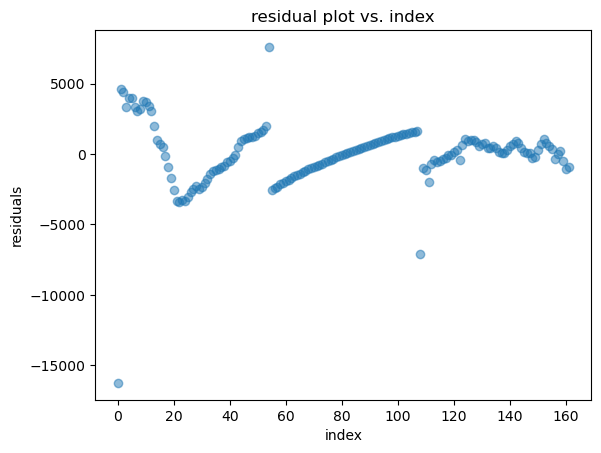

In [64]:
# order i.e. index vs res
# CHECK AUTOCORRELATION
plt.scatter(range(len(X_poly)), res_poly, alpha=0.5)
plt.xlabel("index")
plt.ylabel("residuals")
plt.title("residual plot vs. index")
plt.show()

 # Main Observations: Residuals vs. Index plot
 - Most of the residuals in this graph lie within the range (-5000 to 5000).
 - At the lower-left hand corner there is an outlier - which means that the model estimates lower than the actual value.
 - This may mean that there is a country with very high CO2 emmissions, potentially due to major events in that country or just high CO2 Emmissions compared to the predictions. 

- There is also a group of outliers around index zero at residual 5000, which residuals are just a bit higher than the rest of the graph.  Which means that there was a overestimation by the model. This could mean that those countries have more climate aware and have more "green" policies, or that there is a inconsistancy that causes a relatively low C02 emmission.



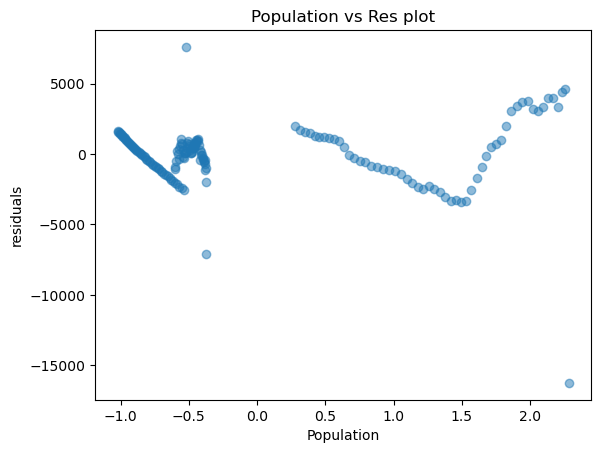

In [65]:
# Population (i.e. X) versus Residuals
# CHECK LINEARITY and Homoscedasticity
plt.scatter(pop, res_poly, alpha=0.5)
plt.xlabel("Population")
plt.ylabel("residuals")
plt.title("Population vs Res plot")
plt.show()

# Main Observations: Population vs. Residuals plot
- Most of the residuals are between the population -1.0 and 0
- The one of most significant outlier is at the residual -15,000 and population of 2.0, which represents where the model severly underpredicted the CO2 levels compared to the population. This could mean that that country produces a lot of materials and goods which could lead to high CO2 emmission.
- Another outlier is around population -0.5 and residual 9000, the model predicted a way higher CO2 than the actual emissions.
This could be due to a country that just doesn't indrustrailize as much as other countries with similar populations.





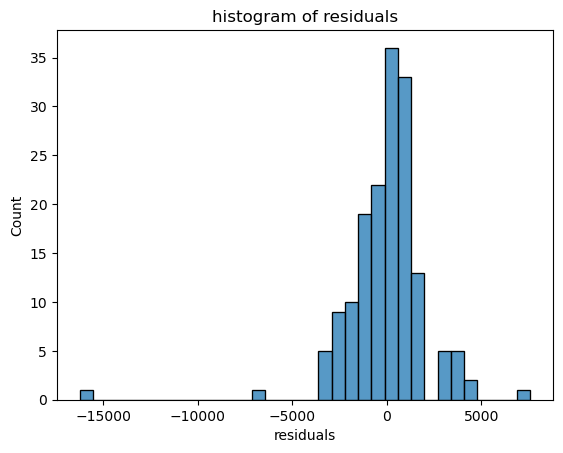

In [66]:
# histogram of residuals
# CHECK NORMALITY
sns.histplot(res_poly, kde=False)
plt.xlabel("residuals")
plt.title("histogram of residuals")
plt.show()

- linearity: good, there are 4 outliers. Residuals are cluttered when `Total Population` is small. There is a gap where there is no Residual when `Total Population` is between -0.5 to 0.25 .
- auto correlation: good, we have included One Hot Encoded `Income Level` into the X attribute `Total Population`
- normality: yes, residuals are mostly centered around 0
- Homoscedasticity:
  - Residuals are cluttered when `Total Population` is small. There is a gap where there is no Residual when `Total Population` is between -0.5 to 0.25 . Residuals follow a decreasing trend when `Total Population` is between 0.25 to 1.5, then follow an increasing trend

### Ethical considerations: